## Simulation

In [1]:
%load_ext autoreload
%autoreload 2

from entities.simulation import Simulation

"""
The car spawn policy determines the directions in which cars 
will spawn and the duration for which they will spawn in that direction.
"""
spawning_rules = [
     ('all_directions', 300),      # 5 minutes    
     ('no_cars', 60),              # 1 minute  
     ('up_down', 120),             # 2 minutes
     ('left_right', 120),          # 2 minutes
     ('all_directions', 300)       # 5 minutes 
]

simulation = Simulation(
     car_spawn_rate=1.5,  
     spawning_rules=spawning_rules
)


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.5.2 (SDL 2.30.5, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
Simulation duration: 900 seconds


In [2]:
simulation.run('ft', save_stats=True)

In [ ]:
simulation.run('pi', save_stats=True)

In [4]:
simulation.run('vi', save_stats=True)

## Load data

In [1]:
import pandas as pd

# Load the cumulative waiting times
cumulative_waiting_times_pi = pd.read_csv('data/cumulative_waiting_times_pi.csv', index_col=1, names=['cumulative_waiting_time']).reset_index(drop=True)
cumulative_waiting_times_vi = pd.read_csv('data/cumulative_waiting_times_vi.csv', index_col=1, names=['cumulative_waiting_time']).reset_index(drop=True)
cumulative_waiting_times_ft = pd.read_csv('data/cumulative_waiting_times_ft.csv', index_col=1, names=['cumulative_waiting_time']).reset_index(drop=True)

# Load the number of stopped cars
n_stopped_cars_pi = pd.read_csv('data/stopped_cars_pi.csv', index_col=0, names=['stopped_cars']).reset_index()['stopped_cars'][0]
n_stopped_cars_vi = pd.read_csv('data/stopped_cars_vi.csv', index_col=0, names=['stopped_cars']).reset_index()['stopped_cars'][0]
n_stopped_cars_ft = pd.read_csv('data/stopped_cars_ft.csv', index_col=0, names=['stopped_cars']).reset_index()['stopped_cars'][0]

# Load the queue lengths
queue_lengths_pi = pd.read_csv('data/queue_lengths_pi.csv', index_col=1, names=['queue_length']).reset_index(drop=True)
queue_lengths_vi = pd.read_csv('data/queue_lengths_vi.csv', index_col=1, names=['queue_length']).reset_index(drop=True)
queue_lengths_ft = pd.read_csv('data/queue_lengths_ft.csv', index_col=1, names=['queue_length']).reset_index(drop=True)

## Plot results

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('seaborn-v0_8-pastel')

In [3]:
# Color palette
plot_green = "#6BC8A3"
plot_yellow = "#FFD84C"
plot_red = "#FF8B60"

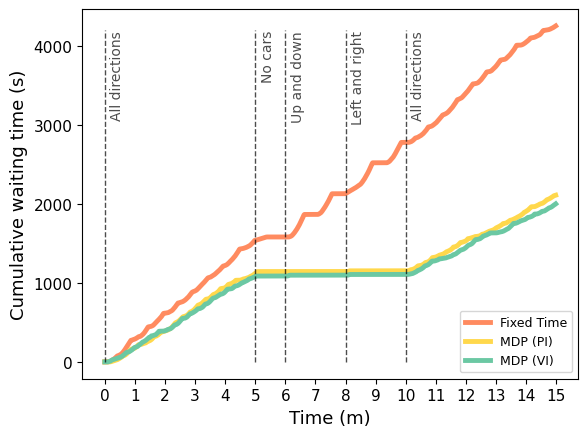

In [9]:
## The Fixed Time agent makes people arrive late!

plt.plot(range(len(cumulative_waiting_times_ft)), cumulative_waiting_times_ft, label='Fixed Time', color=plot_red, linewidth=3.5)
plt.plot(range(len(cumulative_waiting_times_pi)), cumulative_waiting_times_pi, label='MDP (PI)', color=plot_yellow, linewidth=3.5)
plt.plot(range(len(cumulative_waiting_times_vi)), cumulative_waiting_times_vi, label='MDP (VI)', color=plot_green, linewidth=3.5)

plt.xlabel('Time (m)', fontsize=13)
plt.ylabel('Cumulative waiting time (s)', fontsize=13)

ax = plt.gca()
ax.set_yticks([0, 1000, 2000, 3000, 4000])
ax.set_xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900])

ax.set_xticklabels([f'{int(x)//60}' for x in ax.get_xticks()], fontsize=11)
ax.set_yticklabels([f'{y}' for y in ax.get_yticks()], fontsize=11)

plt.vlines(0, 0, 4200, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(25, 4200, 'All directions', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(300, 0, 4200, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(325, 4200, 'No cars', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(360, 0, 4200, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(385, 4200, 'Up and down', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(480, 0, 4200, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(505, 4200, 'Left and right', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(600, 0, 4200, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(625, 4200, 'All directions', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')

plt.legend(prop={'size': 9}, loc='lower right')

plt.show()

C:\Users\sandr\AppData\Local\Temp\ipykernel_11788\2282215093.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MDP (VI)', 'MDP (PI)', 'Fixed Time'], fontsize=11)


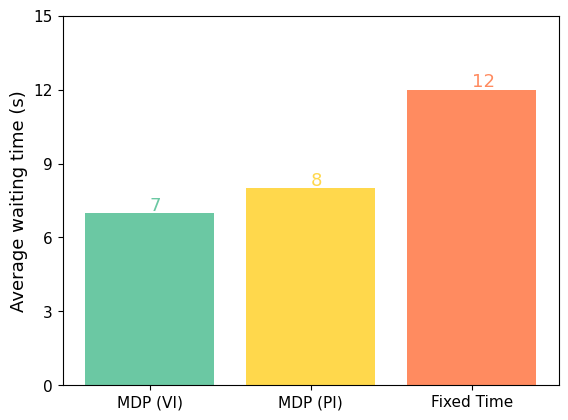

In [15]:
# Stick plot of average waiting times
plt.bar(['MDP (PI)', 'MDP (VI)', 'Fixed Time'], 
        [cumulative_waiting_times_vi['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_vi,
         cumulative_waiting_times_pi['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_pi,
         cumulative_waiting_times_ft['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_ft
         ],
        color=[plot_green, plot_yellow, plot_red])

plt.ylabel('Average waiting time (s)', fontsize=13)
ax = plt.gca()
ax.set_xticklabels(['MDP (VI)', 'MDP (PI)', 'Fixed Time'], fontsize=11)
ax.set_yticks([0, 3, 6, 9, 12, 15])
ax.set_yticklabels([f'{y}' for y in ax.get_yticks()], fontsize=11)  

plt.text(0, cumulative_waiting_times_vi['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_vi + 0.1, f'{cumulative_waiting_times_vi["cumulative_waiting_time"].tail(1).values[0]//n_stopped_cars_vi}', fontsize=13, color=plot_green)
plt.text(1, cumulative_waiting_times_pi['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_pi + 0.1, f'{cumulative_waiting_times_pi["cumulative_waiting_time"].tail(1).values[0]//n_stopped_cars_pi}', fontsize=13, color=plot_yellow)
plt.text(2, cumulative_waiting_times_ft['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_ft + 0.1, f'{cumulative_waiting_times_ft["cumulative_waiting_time"].tail(1).values[0]//n_stopped_cars_ft}', fontsize=13, color=plot_red)

plt.show()

## Queue lengths plots

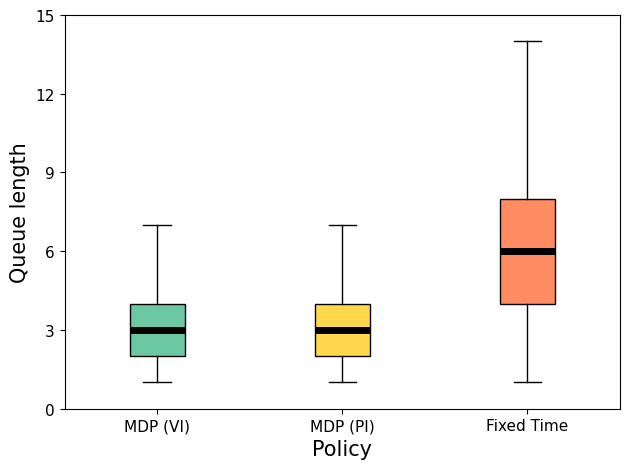

In [18]:
# Plot 2 boxplots of queue lengths
data = [queue_lengths_vi['queue_length'],
        queue_lengths_pi['queue_length'],
        queue_lengths_ft['queue_length']]
colors = [plot_green, plot_yellow, plot_red]
labels = ['MDP (VI)', 'MDP (PI)', 'Fixed Time']
ax = plt.gca()
bplot = ax.boxplot(data,
            patch_artist=True,
            medianprops=dict(color='black', linewidth=5),
            )

ax.set_xticklabels(labels, fontsize=11)
ax.set_yticks([0, 3, 6, 9, 12, 15])
ax.set_yticklabels([f'{y}' for y in ax.get_yticks()], fontsize=11)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Queue length', fontsize=15)
plt.xlabel('Policy', fontsize=15)

plt.tight_layout()

C:\Users\sandr\AppData\Local\Temp\ipykernel_11788\4158332186.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['MDP (VI)', 'MDP (PI)', 'Fixed Time'], fontsize=11)


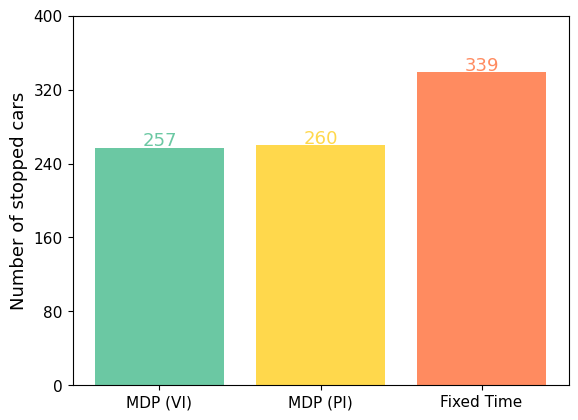

In [21]:
# Barplot of number of stopped cars

plt.bar(['MDP (VI)', 'MDP (PI)', 'Fixed Time'],
        [n_stopped_cars_vi, n_stopped_cars_pi, n_stopped_cars_ft],
        color=[plot_green, plot_yellow, plot_red])

plt.ylabel('Number of stopped cars', fontsize=13)

ax = plt.gca()

ax.set_xticklabels(['MDP (VI)', 'MDP (PI)', 'Fixed Time'], fontsize=11)

ax.set_yticks([0, 80, 160, 240, 320, 400])

ax.set_yticklabels([f'{int(y)}' for y in ax.get_yticks()], fontsize=11)

plt.text(0, n_stopped_cars_vi+2, f'{n_stopped_cars_vi}', fontsize=13, color=plot_green, horizontalalignment='center')
plt.text(1, n_stopped_cars_pi+2, f'{n_stopped_cars_pi}', fontsize=13, color=plot_yellow, horizontalalignment='center')
plt.text(2, n_stopped_cars_ft+2, f'{n_stopped_cars_ft}', fontsize=13, color=plot_red, horizontalalignment='center')

plt.show()